## System 2

Copyright: Reid Wyde 2020

last updated: 3.12.20

teatment impulse


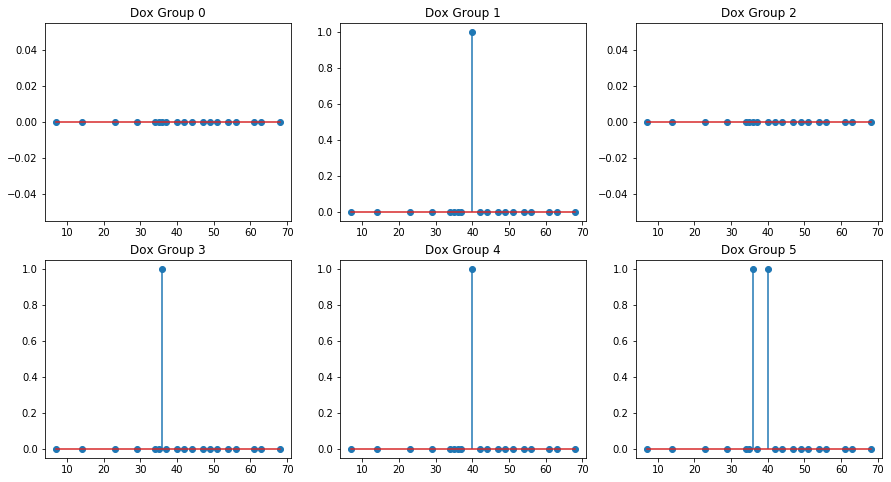

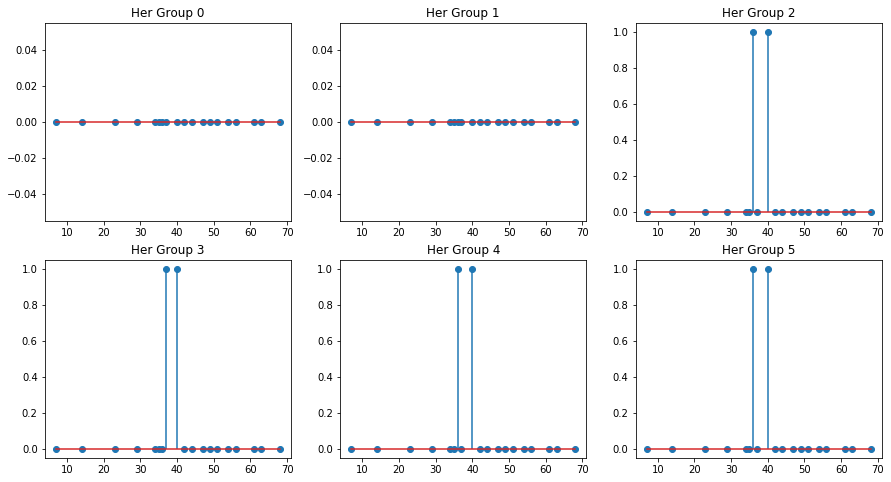

In [1]:
#data
from get_tumor_db import get_tumor_db
from parse_tumor_db import parse_tumor_db

#visualization
import plot_data

#treatment
import treatment_model as tm

#growth model
from growth_model import growth_model_2

#forward model
import rk_utils

#arrays
import numpy as np

#file system
import os

#CSV read
import pandas as pd

import warnings
warnings.filterwarnings("ignore")



np.random.seed(123)

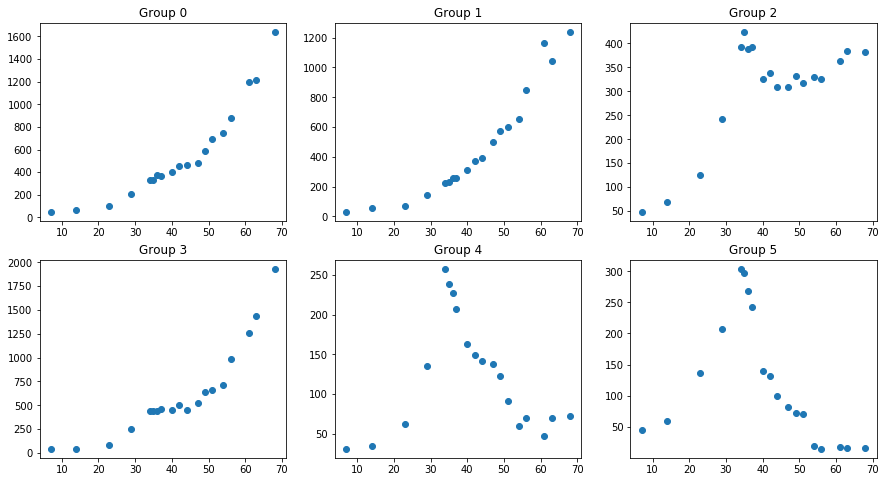

In [2]:
tumor_size_db = get_tumor_db()
ts, Ts, sigmas = parse_tumor_db(tumor_size_db)
plot_data.plot_tumor_data(ts, Ts)

## Growth Model 2

$$ \frac{d \phi_t}{dt} = r \phi_t - \lambda_h \phi_h \phi_t - \lambda_{ho} \phi_h \phi_o \phi_t $$

$$ \frac{d \phi_o}{dt} = \lambda_{od} \phi_d - \tau_o \phi_o $$

$$ \frac{d \phi_d}{dt} = - \tau_d \phi_d + \delta (t - \eta_d) D_d $$

$$ \frac{d \phi_h}{dt} = - \tau_h \phi_h + \delta (t - \eta_h) D_h e^{-\lambda_{dh} \phi_d} $$


r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh

## Simulate with fixed parameters

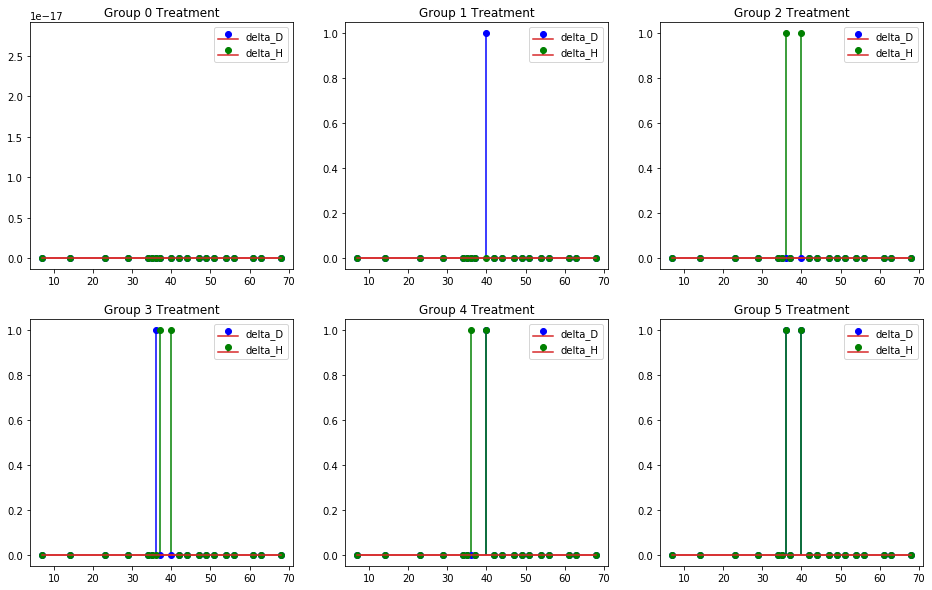

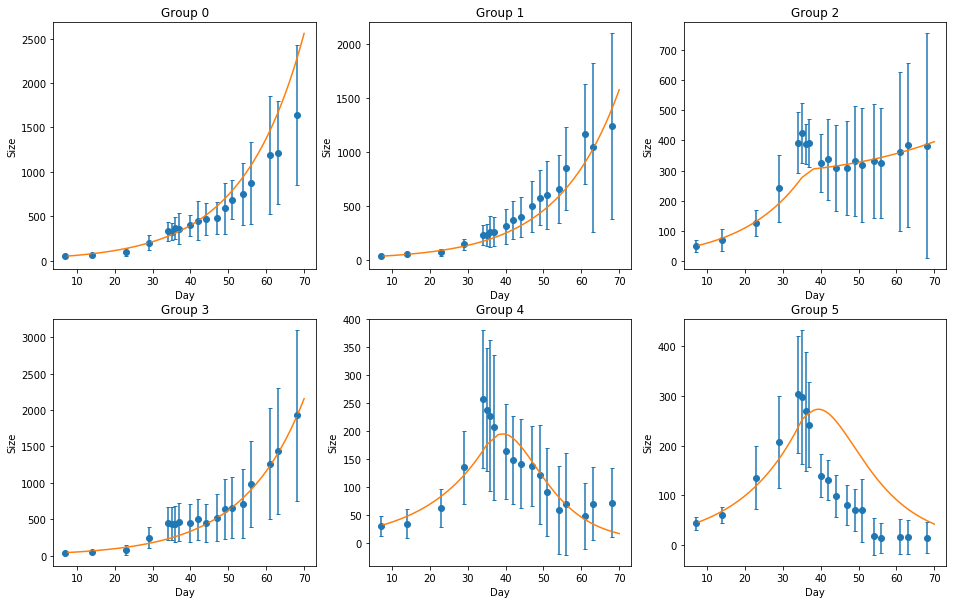

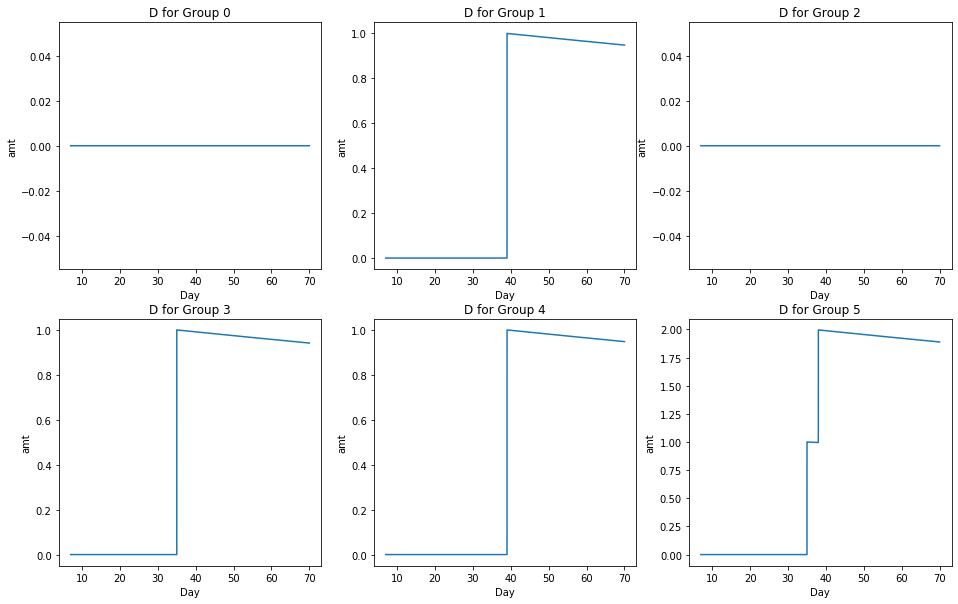

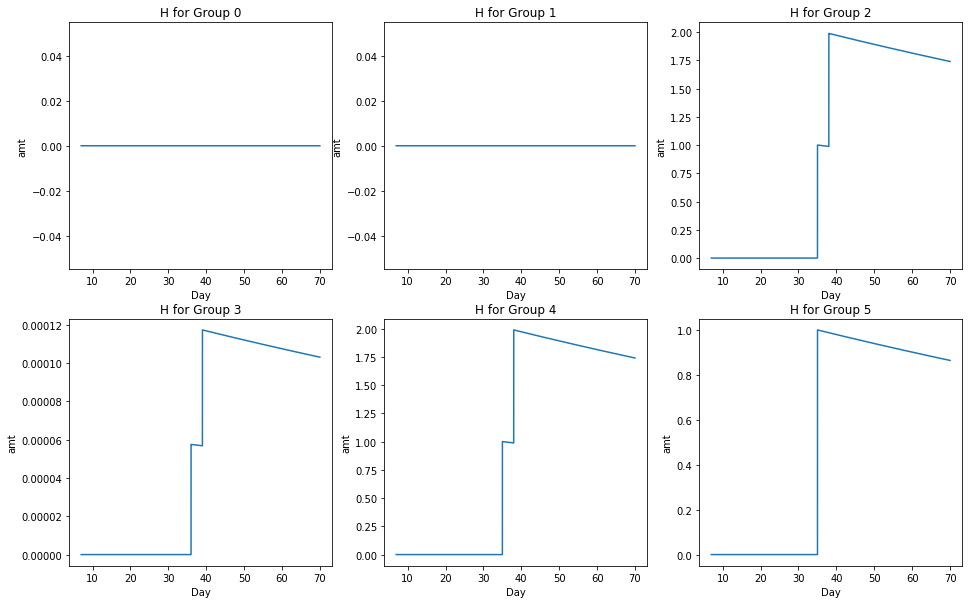

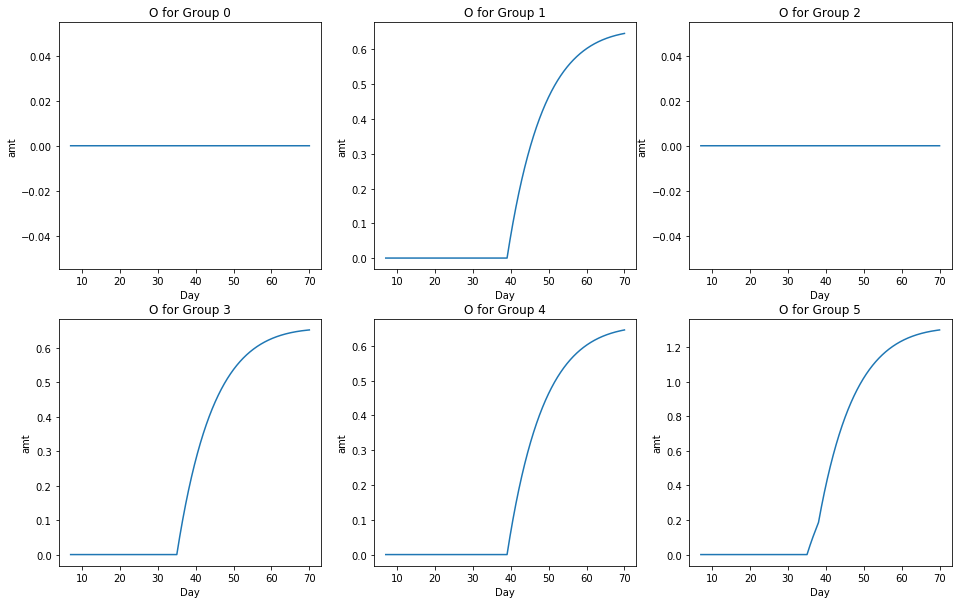

r = 0.0619
lambda_h = 0.0289
lambda_ho = 0.1
lambda_od = 0.0703
tau_o = 0.1
tau_d = 0.00172
tau_h = 0.00417
lambda_dh = 9.78


In [3]:
r = 6.19e-2
lambda_h = 2.89e-2
lambda_ho = 1e-1
lambda_od = 7.03e-2
tau_o = 1e-1
tau_d = 1.72e-3
tau_h = 4.17e-3
lambda_dh = 9.78
        
sim_params = np.array([r, lambda_h, lambda_ho, lambda_od, tau_o, tau_d, tau_h, lambda_dh])

growth_model_2().sim_graph_model(sim_params)

## Fit parameters with MCMC

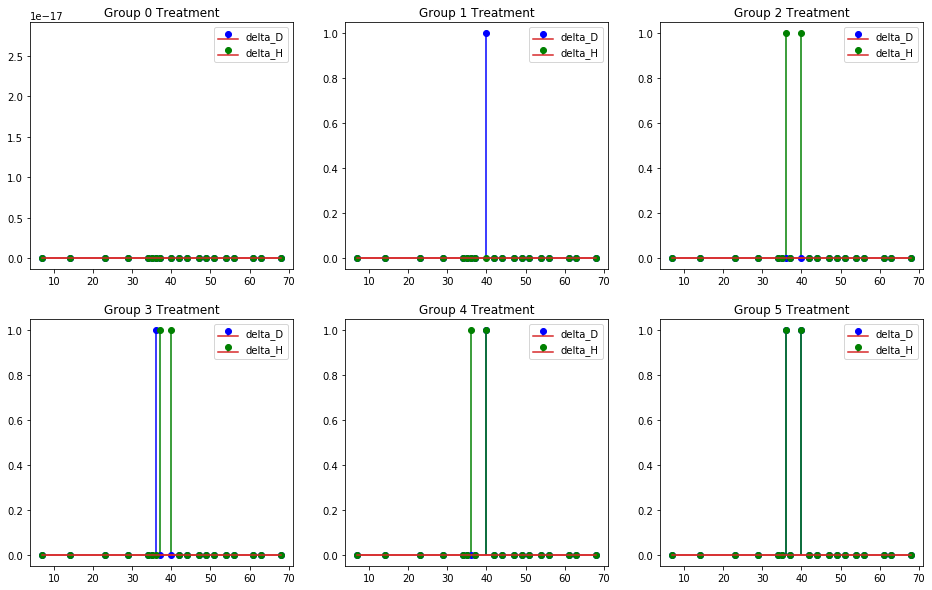

Sequential sampling (20 chains in 1 job)
CompoundStep
>Metropolis: [lambda_dh]
>Metropolis: [tau_h]
>Metropolis: [tau_d]
>Metropolis: [tau_o]
>Metropolis: [lambda_od]
>Metropolis: [lambda_ho]
>Metropolis: [lambda_h]
>Metropolis: [r]
Sampling chain 19, 0 divergences: 100%|████████████████████████████████████████████| 1500/1500 [01:54<00:00, 13.08it/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [02:11<00:00, 152.24it/s]


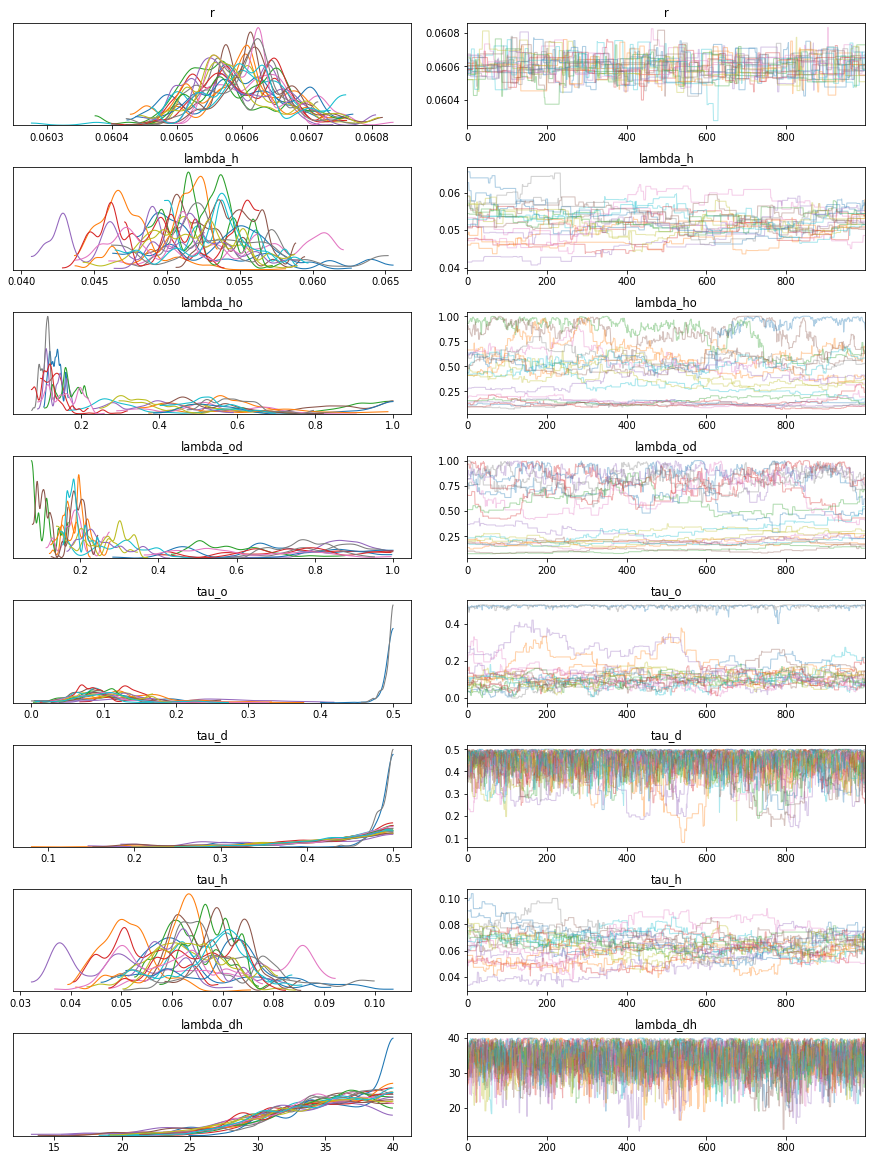

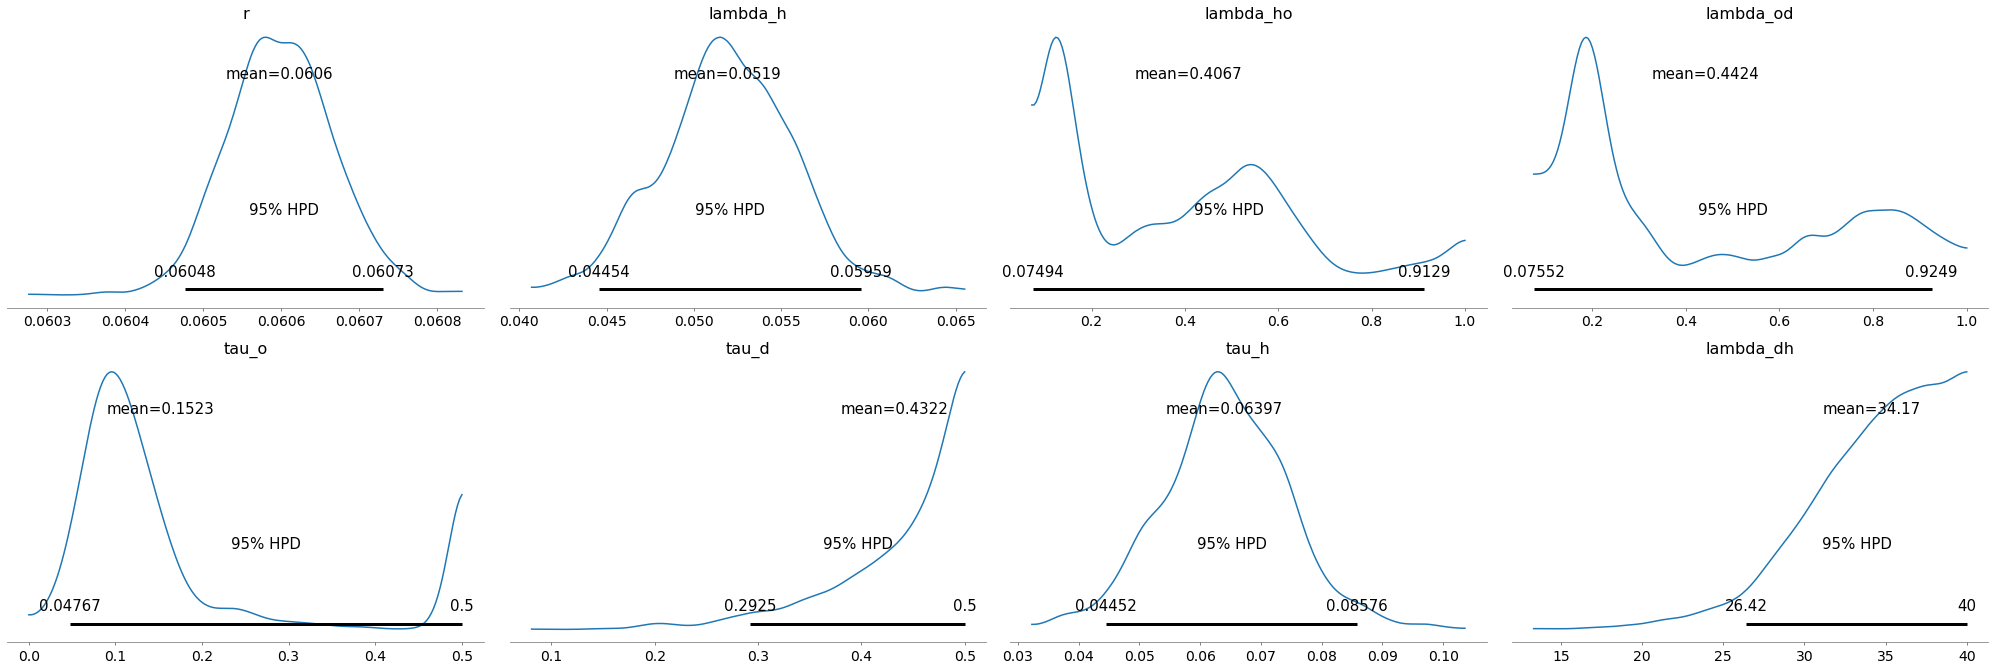

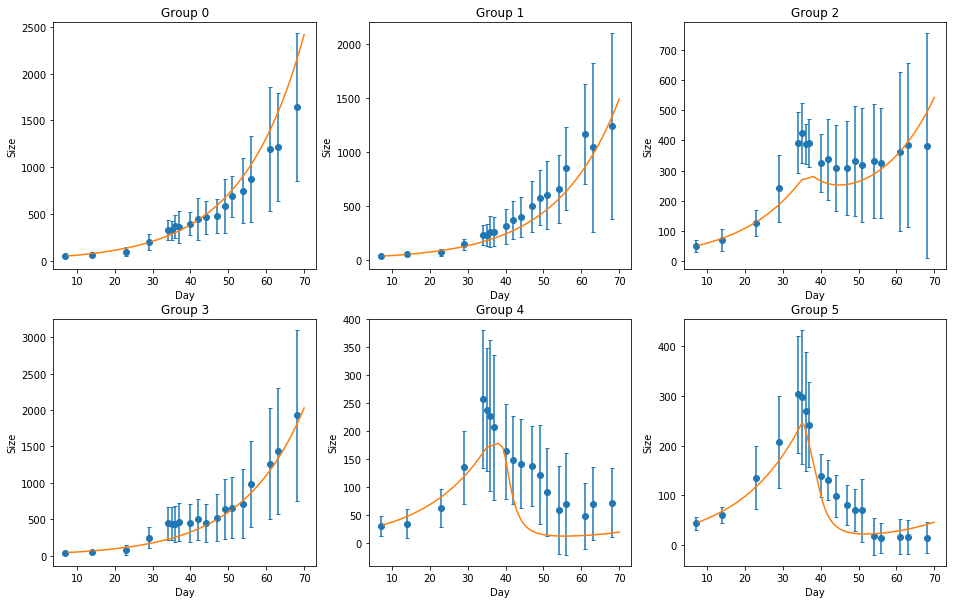

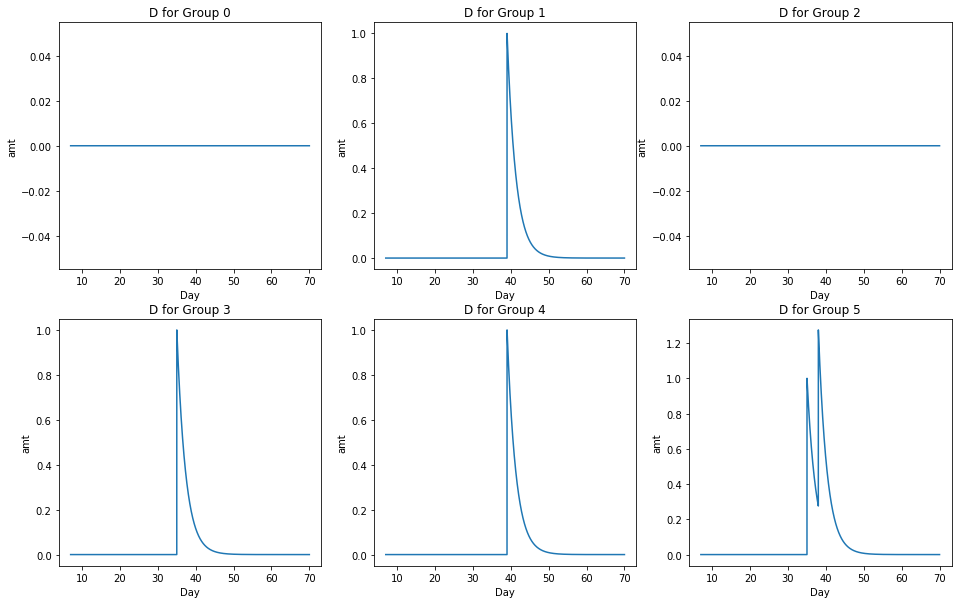

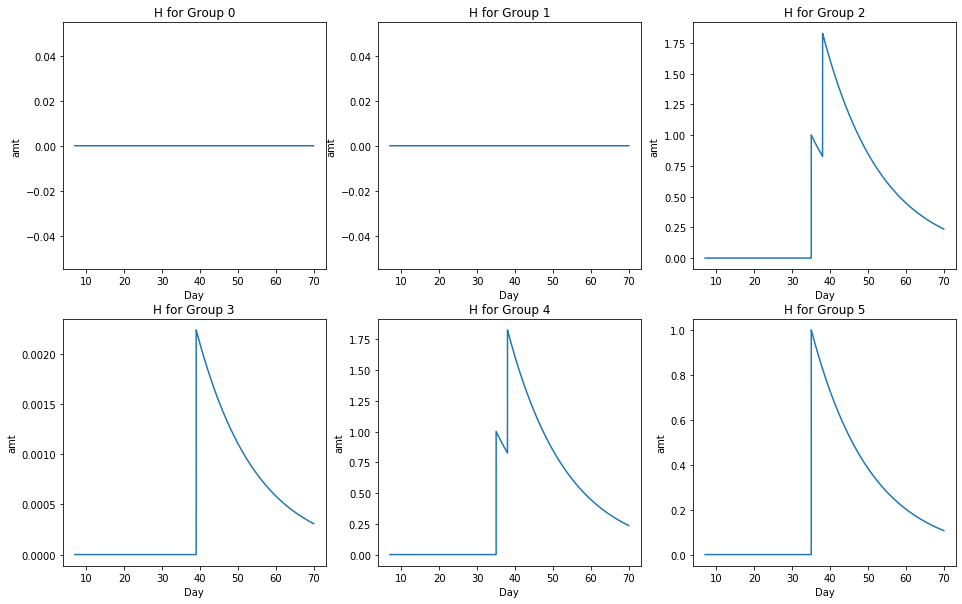

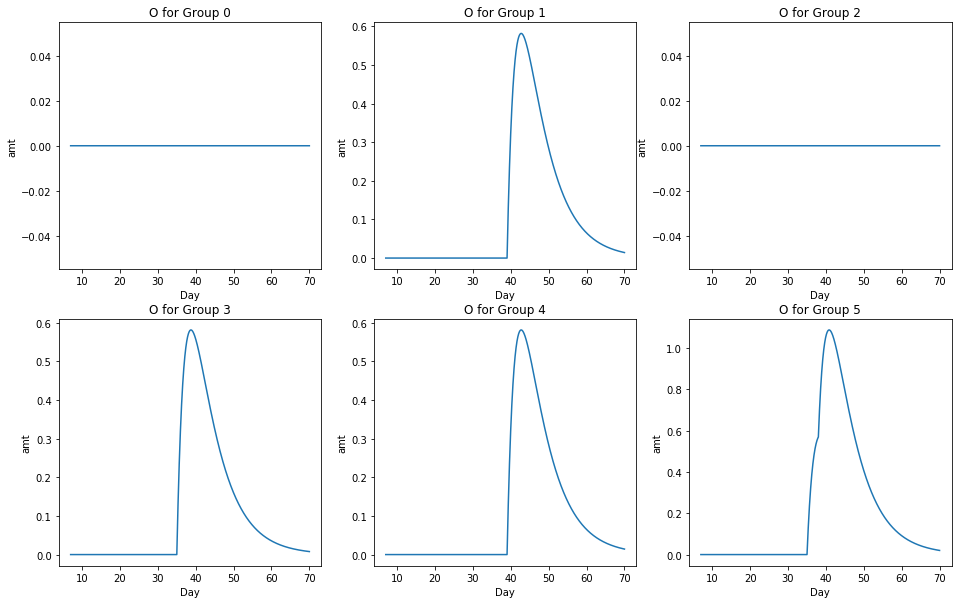

r = 0.061
lambda_h = 0.052
lambda_ho = 0.407
lambda_od = 0.442
tau_o = 0.152
tau_d = 0.432
tau_h = 0.064
lambda_dh = 34.167


In [4]:
growth_model_2().fit_sim_graph_model()